<h1> <center> MOVIE RECOMMENDER SYSTEM 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

In [29]:
movies=pd.read_csv(r"C:\Users\angsh\OneDrive\Desktop\Machine Learning Projects\archive (14)\movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


<h3>Movie dataset has
movieId – once the recommendation is done, we get a list of all similar movieId and get the title for
each movie from this dataset.
genres – which is not required for this filtering approach.


In [31]:
ratings=pd.read_csv(r"C:\Users\angsh\OneDrive\Desktop\Machine Learning Projects\archive (14)\ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [32]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


<h2>Ratings dataset hasuserId – unique for each user.<br>
movieId – using this feature, we take the title of the movie from the movies dataset.<br>
rating – Ratings given by each user to all the movies using this we are going to predict the top 10
similar movies.</h2>


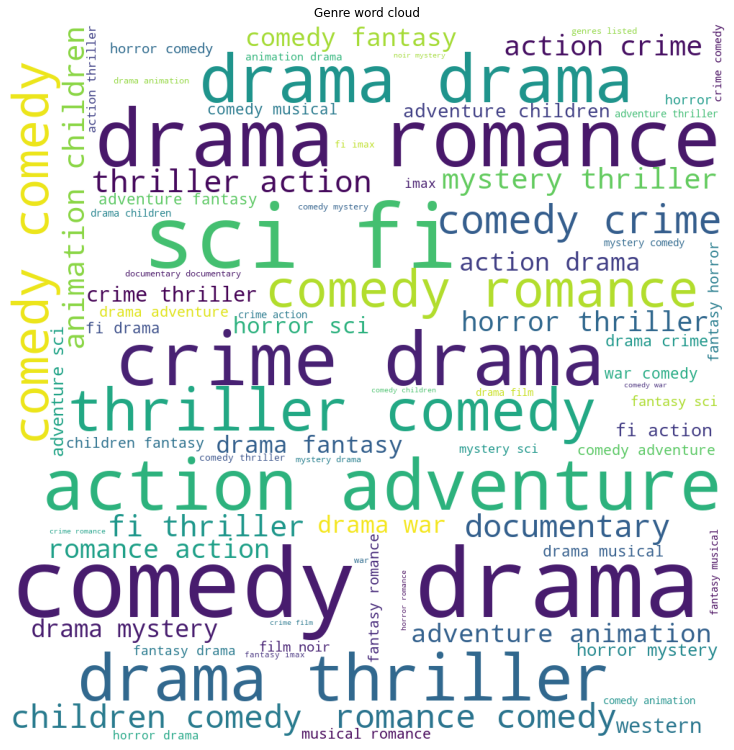

In [33]:
#Let us create a word cloud of the genre from the movies dataset
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in movies.genres:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plot.figure(figsize = (20, 10), facecolor = None)
plot.imshow(wordcloud)
plot.axis("off")
plot.tight_layout(pad = 0)
plot.title("Genre word cloud")
  
plot.show()

<h2>The ratings dataset is a bit difficult to interpret and so needs to be reformed. Let us create a pivot table

In [34]:
#this table is much easier to interpret, corresponding to each movie Id we have user Id and  the rating. If a user hasn't rated then NAN is displayed.
df=ratings.pivot(index='movieId',columns='userId',values='rating')
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#lets impute the table where NaN values can be converted to 0
df.replace(np.nan,0,inplace=True)
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>we will reduce the noise by
adding some filters for the df dataset.
<ul>
<li>To qualify a movie, a minimum of 10 users should have voted a movie.</li>
<li>To qualify a user, a minimum of 50 movies should have voted by the user.</li>



In [36]:
movie_filtered=ratings.groupby('movieId')['rating'].count()
movie_filtered.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

In [37]:
user_filtered=ratings.groupby('userId')['rating'].count()
user_filtered.head()

userId
1    232
2     29
3     39
4    216
5     44
Name: rating, dtype: int64

Text(0.5, 1.0, 'Scatter plot of movieId vs No of users voted')

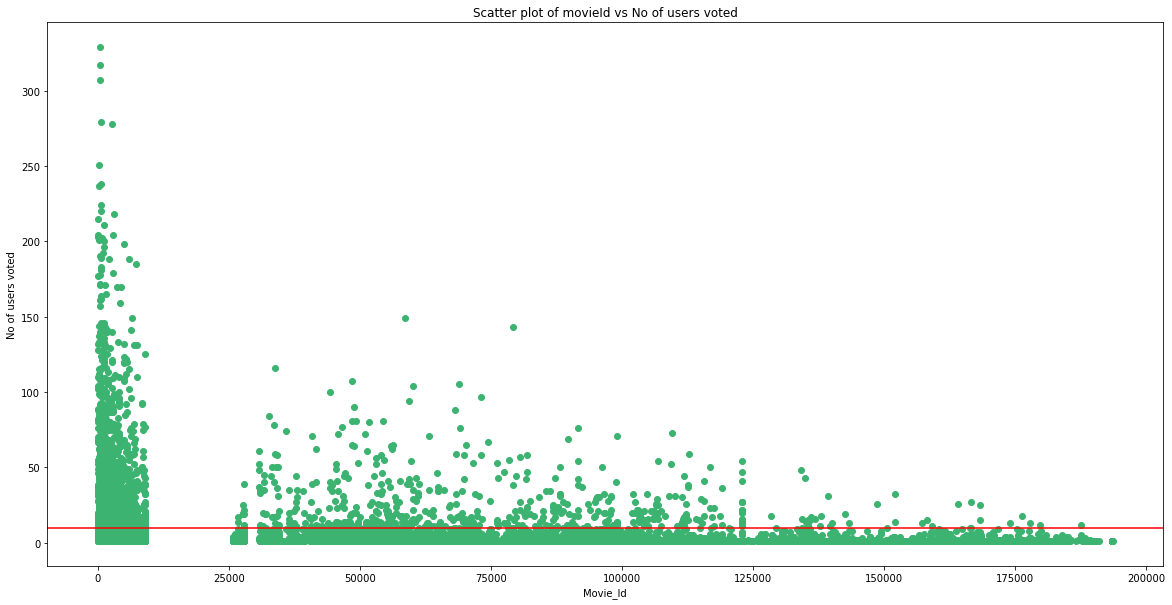

In [38]:
#let us plot a scatterplot
plot.figure(figsize=(20,10))
plot.scatter(movie_filtered.index,movie_filtered,color='mediumseagreen')
plot.xlabel("Movie_Id")
plot.ylabel("No of users voted")
plot.axhline(y=10,color="red")
plot.title("Scatter plot of movieId vs No of users voted")

In [39]:
#let us filter df using this threshold value
df=df.loc[movie_filtered[movie_filtered>10].index,:]

Text(0.5, 1.0, 'Scatter plot of user_id vs No of movies rated')

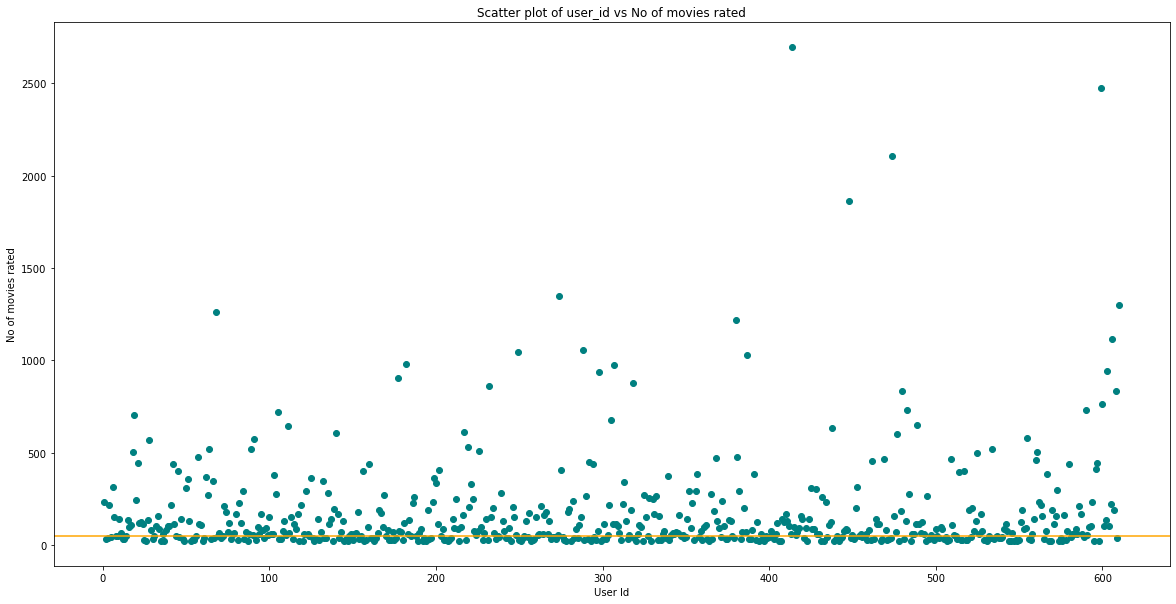

In [40]:
#let us plot a scatterplot for user_filtered
plot.figure(figsize=(20,10))
plot.scatter(user_filtered.index,user_filtered,color='teal')
plot.xlabel("User Id")
plot.ylabel("No of movies rated")
plot.axhline(y=50,color="orange")
plot.title("Scatter plot of user_id vs No of movies rated")

In [41]:
#let us filter df using this threshold value
df=df.loc[:,user_filtered[user_filtered>50].index]

In [42]:
df.head()

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 1 to 187593
Columns: 378 entries, 1 to 610
dtypes: float64(378)
memory usage: 6.1 MB


It is a 2121 x 378 dataset and a sparse. 
<br>
<h1> What is sparsity of data matrix? <br>

parsity and Density go hand in hand: <br>

If data is meaningful / useful / not random, you will have regions where data points come together and cluster, and you will have areas they avoid coming together. <br>

One way to think of sparsity is how space is empty (60%), whereas 40% of space is dense, or filled. <br>

So good data looks like swiss cheese. Big bubbles of nothing!

we need to reduce the sparsity <br>
<h2>Our final_dataset has dimensions of 2121 * 378 where most of the values are sparse. We are using only a
small dataset but for the original large dataset of movie lens which has more than 100000 features, our
system may run out of computational resources when that is feed to the model. To reduce the sparsity we
use the csr_matrix function from the scipy library.</h2>


<h1>If most of the elements of the matrix have 0 value, then it is called a sparse matrix. The two major benefits of using sparse matrix instead of a simple matrix are:<br>

<h1>Storage: There are lesser non-zero elements than zeros and thus lesser memory can be used to store only those elements.<br>
Computing time: Computing time can be saved by logically designing a data structure traversing only non-zero elements.
Sparse matrices are generally utilized in applied machine learning such as in data containing data-encodings that map categories to count and also in entire subfields of machine learning such as natural language processing (NLP).</h1>

In [44]:
#let us understand the purpose of using a csr_matrix function
#how to calculate sparsity of a matrix
#formula: 1 - (no of non zero elements/size of the matrix)
#let us see an example
sample=np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])

In [45]:
sample.size #no of rows * no of columns

15

In [46]:
#sparsity
sparsity=1 - (np.count_nonzero(sample)/sample.size)
print(sparsity) #we can see sparisty is high

0.7333333333333334


In [47]:
print("density= ",np.count_nonzero(sample)/sample.size)

density=  0.26666666666666666


In [48]:
#lets reduce the sparisty
csr_mat=csr_matrix(sample)
print(csr_mat)#The function csr_matrix() is used to create a sparse matrix of compressed sparse row format
#As you can see there is no sparse value in the csr_sample and values are assigned as rows and column
#index. for the 0th row and 2nd column, the value is 3.

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [49]:
#let us do it for the df dataset
csr_data = csr_matrix(df.values)

In [50]:
print(csr_data)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (2118, 205)	4.0
  (2118, 345)	1.5
  (2118, 357)	4.0
  (2118, 369)	4.5
  (2119, 37)	3.5
  (2119, 62)	3.0
  (2119, 98)	0.5
  (2119, 127)	4.5
  (2119, 156)	4.5
  (2119, 236)	0.5
  (2119, 256)	4.5
  (2119, 317)	2.0
  (2119, 345)	2.0
  (2119, 357)	5.0
  (2119, 365)	3.5
  (2120, 37)	4.0
  (2120, 62)	5.0
  (2120, 146)	2.5
  (2120, 155)	4.5
  (2120, 156)	5.0
  (2120, 186)	5.0
  (2120, 205)	4.0
  (2120, 236)	3.0
  (2120, 317)	3.5
  (2120, 357)	4.0


In [51]:
df.reset_index(inplace=True)

In [52]:
#creating similarity matrix # We will be using KNN algorithm to compute the cosine similarity matrix which is fast and reliable
knn=NearestNeighbors(metric='cosine',algorithm='brute', n_neighbors=20, n_jobs=-1).fit(csr_data)

In [53]:
#let us create the model for movie recommendation system
#The working principle is very simple. We first check if the movie name input is in the database and if it is
#we use our recommendation system to find similar movies and sort them based on their similarity
#distance and output only the top 10 movies with their distances from the input movie.
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = df[df['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = df.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df1 = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df1
    else:
        return "No movies found. Please check your input"


In [59]:
#creating the interface
df1=get_movie_recommendation('Iron Man')
df1

,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319


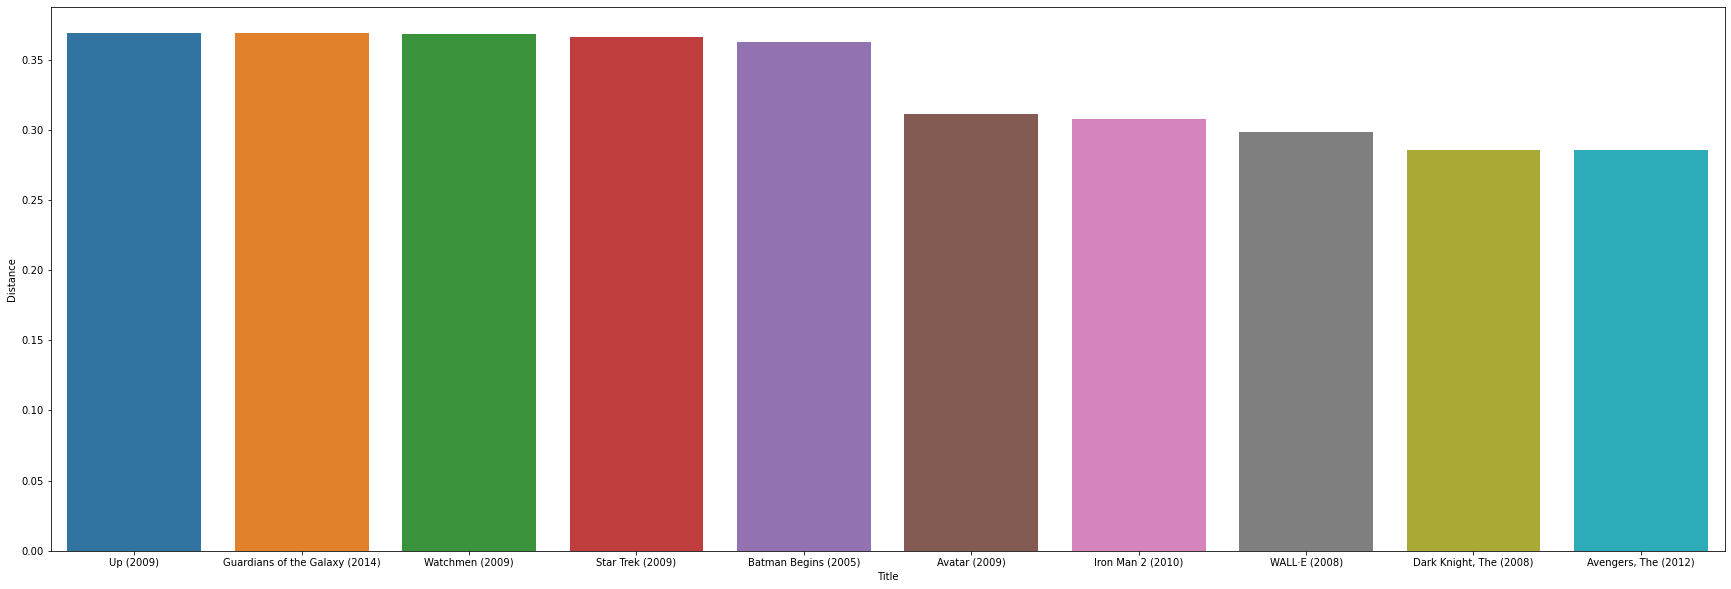

In [63]:
plot.figure(figsize=(30,10))
sns.barplot(x='Title',y='Distance',data=df1)

In [64]:
df2=get_movie_recommendation('Avatar')

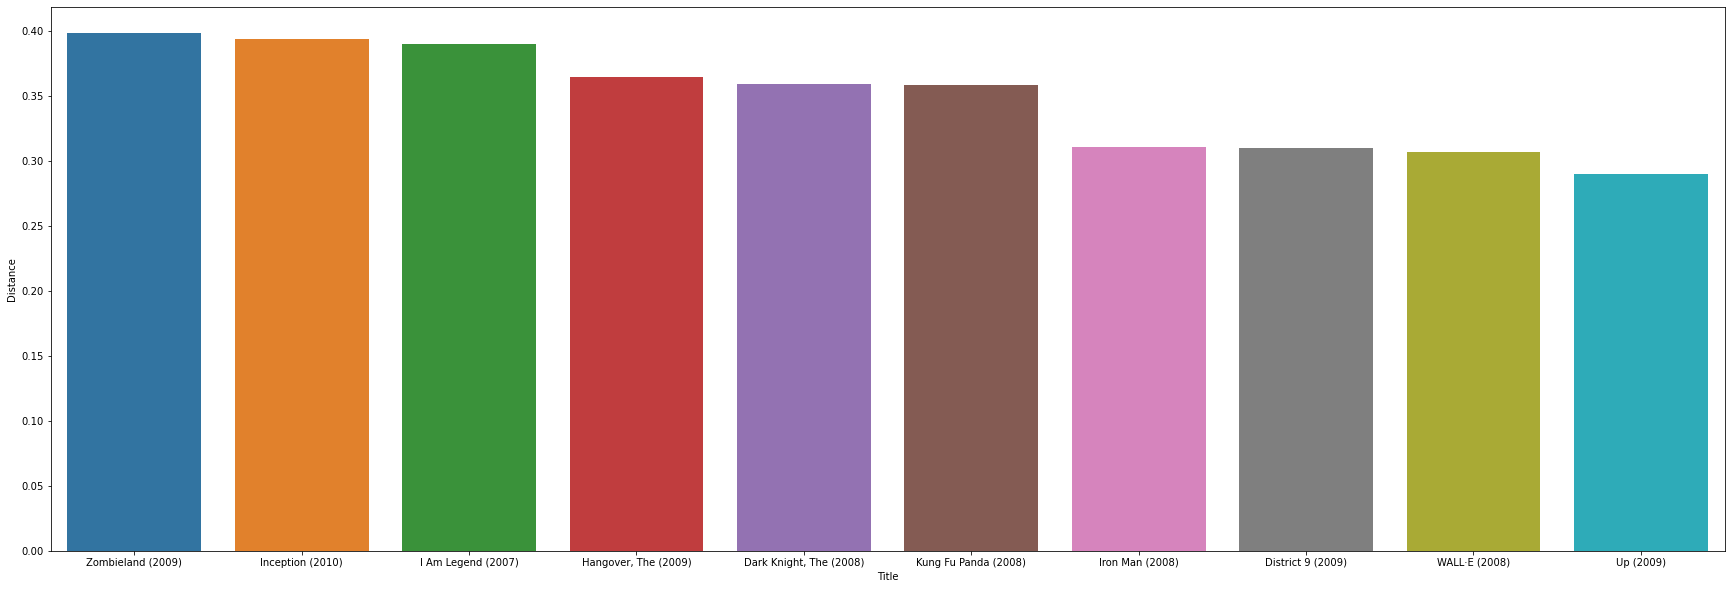

In [65]:
plot.figure(figsize=(30,10))
sns.barplot(x='Title',y='Distance',data=df2)